#Preprocess
In this script we were testing the possibility to change remove the background of the images using HSV filtering.


##Importing library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import os,cv2
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from PIL import Image
import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json

##Unzipping the dataset

In [2]:
# mount gdrive

from google.colab import drive
drive.mount('/gdrive')
!unzip -q /gdrive/MyDrive/ANNDL/Homework1/training_dataset_homework1.zip 

Mounted at /gdrive


In [ ]:
%ls

sample_data/  training_data_final/


##Filter

training_data_final/Species6/00116.jpg


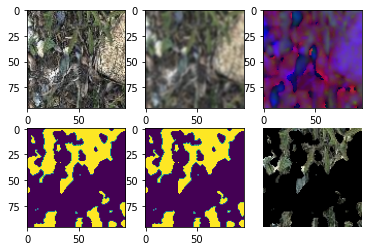

(96, 96, 1)
(96, 96, 1)
KerasTensor(type_spec=TensorSpec(shape=(96, 96, 4), dtype=tf.float32, name=None), name='concatenate/concat:0', description="created by layer 'concatenate'")


In [3]:
import os
import random
lwr_hsv = (25,20,20)
upr_hsv = (90,255,255)
img_path = 'training_data_final'

#for imgdir in img_path:
imgdir = os.path.join(img_path, random.choice(os.listdir(img_path)))
imgdir = os.path.join(imgdir, random.choice(os.listdir(imgdir)))
#imgdir = 'training_data_final/Species7/00084.jpg'
print(imgdir)
img = cv2.imread(imgdir)
blurr = cv2.GaussianBlur(img,(5,5),0)
hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv,lwr_hsv,upr_hsv)
struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
boolean = mask>0
new_img = np.zeros_like(img,np.uint8)
new_img[boolean] = img[boolean]
res_img = new_img

plt.subplot(2,3,1);plt.imshow(img)# ORIGINAL
plt.subplot(2,3,2);plt.imshow(blurr) # BLURRED
plt.subplot(2,3,3);plt.imshow(hsv) # HSV CONVERTED
plt.subplot(2,3,4);plt.imshow(mask) # MASKED
plt.subplot(2,3,5);plt.imshow(boolean) # BOOLEAN MASKED
plt.subplot(2,3,6);plt.imshow(new_img)# NEW PROCESSED IMAGE
plt.axis('off')
plt.show()
print(np.expand_dims(mask, axis=(2)).shape)
img_save = Image.fromarray(new_img)
img_save.save("test.jpg")
Image.fromarray(mask).save("mask.jpg")
inputs = tf.keras.Input(shape=(96,96,3))

maskT = tf.convert_to_tensor(np.expand_dims(mask/255, axis=(2)))
print(maskT.shape)
processed = tf.keras.layers.Concatenate()([inputs[0], maskT])
print(processed)
